## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)
import statsmodels.api as sm

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
df['user_id'].count()

294478

c. The number of unique users in the dataset.

In [5]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [6]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
df['user_id'].count() - df.query('group == "treatment" and landing_page == "new_page" or group == "control" and landing_page == "old_page"')['user_id'].count()

3893

f. Do any of the rows have missing values?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [4]:
df2 = df.query('group == "treatment" and landing_page == "new_page" or group == "control" and landing_page == "old_page"')

In [5]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [6]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [7]:
df2 = df2.drop_duplicates(subset = 'user_id')

In [8]:
# I doublechecked the results.

df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
df2.query('group == "control"')['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
df2.query('group == "treatment"')['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [9]:
df2.query('landing_page == "new_page"')['user_id'].count() / df2['user_id'].count()

0.50006194422266881

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**According to my results, the control group (users who received the old page) have a higher higher conversion rate than the treatment group (users with the new page), however, the difference between the proportinos does not seem too significant. The probabability that a user gets the new is roughly balanced (very close to 50%), so the lack of opportunities or the inbalanced user groups can not be the cause of the controversions. **

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**My null hypothesis would be that the old page is better or as good as the new page and have more or the same number of visitors compared to the newer page. My alternative would be that the new page is better and has more visitors.**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

** - I calculated the overall convert rate as under my null hypothesis, there is no difference between the conversion rates. So, the convert rate for both $p_{new}$  and $p_{old}$ will be the same as $p_{overall}$ which I calculated earlier in part I 4a. **

** - The convert rate for $p_{new}$  and $p_{old}$ under the null is 0.119597185008. **

In [35]:
p_new = df2.query('converted == 1').user_id.count()/df2.user_id.count()
print('p new convert rate: ', p_new)

p new convert rate:  0.119597087245


b. What is the **convert rate** for $p_{old}$ under the null?
- The convert rate is the same for $p_{old}$ under the null.

In [36]:
# The convert rate is the same for p old under the null

p_old = df2.query('converted == 1').user_id.count()/df2.user_id.count()

print('p old convert rate: ', p_old)

p old convert rate:  0.119597087245


c. What is $n_{new}$?

In [22]:
n_new = df2.query('landing_page == "new_page"')['user_id'].count()
print(n_new)

145310


d. What is $n_{old}$?

In [23]:
n_old = df2.query('landing_page == "old_page"')['user_id'].count()
print(n_old)

145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
new_page_converted = np.random.choice([0,1], size = n_new, p = [1-p_under_null, p_under_null])

print(new_page_converted)

[0 1 0 ..., 0 0 1]


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted = np.random.choice([0,1], size = n_old, p = [1-p_under_null, p_under_null])

print(old_page_converted)

[0 0 1 ..., 0 0 0]


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
new_prob_mean = new_page_converted.mean()
old_prob_mean = old_page_converted.mean()
print(new_prob_mean)
print(old_prob_mean)
print(new_prob_mean - old_prob_mean)

0.119489367559
0.118906342498
0.000583025061387


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [27]:
p_diffs = []

for i in range(10000):
    new_page_converted = np.random.choice([0,1], size = n_new, p = [1-p_under_null, p_under_null])
    old_page_converted = np.random.choice([0,1], size = n_old, p = [1-p_under_null, p_under_null])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean()) 

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

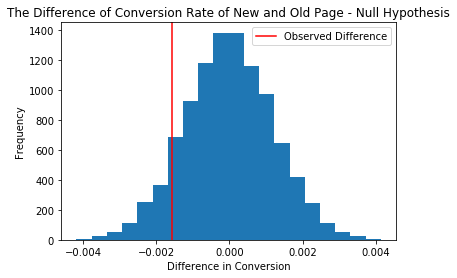

In [28]:
obs_diffs = np.array(p_new_rate-p_old_rate).mean()

plt.hist(p_diffs, bins=20)
plt.title('The Difference of Conversion Rate of New and Old Page - Null Hypothesis')
plt.xlabel('Difference in Conversion')
plt.ylabel('Frequency')
plt.axvline(x=(obs_diffs), color = 'red', label = 'Observed Difference')
plt.legend()
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
(p_diffs > obs_diffs).mean()

0.90259999999999996

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

The value calculated in part **j.** is the p-value, suggesting whether we can reject the null hypothesis or not. The p-value is very high and we calculated that more than 90% of our sample values lies above the observed difference. According to our histogram and results, the new page does not do better and we fail to reject the null.

**Put your answer here.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" and converted == 1')['user_id'].count()
convert_new = df2.query('landing_page == "new_page" and converted == 1')['user_id'].count()
n_old = df2.query('landing_page == "old_page"')['user_id'].count()
n_new = df2.query('landing_page == "new_page"')['user_id'].count()

print('Conversion rate for old page: ', convert_old)
print('Conversion rate for new page: ', convert_new)
print('Number of rows (old page): ', n_old)
print('Number of rows (new page): ', n_new)

Conversion rate for old page:  17489
Conversion rate for new page:  17264
Number of rows (old page):  145274
Number of rows (new page):  145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [42]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
print('Z-score: ', z_score)
print('P-value: ', p_value)

Z-score:  -1.31092419842
P-value:  0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

Z-score indicates how many standard deviations an element is from the mean, our calculated value is -1.312. Our p-value is quite large, with a 0.905 rate we fail to reject the null hypothesis. Our result is similar to what we got in part **j.**, where the p-value were around 0.903.

Sources: 
https://en.wikipedia.org/wiki/Standard_score

http://knowledgetack.com/python/statsmodels/proportions_ztest/

https://www.investopedia.com/terms/z/z-test.asp

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**As we have 2 different outcomes (converted and not converted), we can use the logistic regression model.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [51]:
df2['intercept'] = 1

df2[['ab_page_to_drop', 'ab_page']] = pd.get_dummies(df2['group'])

df2 = df2.drop(['ab_page_to_drop'], axis=1)

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [52]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [53]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 13 Jan 2018   Pseudo R-squ.:               8.077e-06
Time:                        11:37:42   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The p-value in the model in Part III is different from the other p-value I calculated during the Part II because of the two different approach of the calculation. The p-value in the Part II suggest how likely are our data assuming a true null hypothesis. The p-value is quite high in the Part II what suggesting that we fail to reject the null. 

In part III, the p-value associated with the alternative hypothesis is the P>|z| value of ab_page in the model. This value tests if the paramater of the slope (or in the intercept) is equal to null hypothesis and suggest whether the changes in the explanatory variables are related to changes to the response variable (here: converted). A low p-value means that the predictors are very significant to the changes. This p-value is too high to reject the null hypothesis, reflecting that the changes in the explanatory are not associated with the changes in the response value.

Sources: 
http://blog.minitab.com/blog/adventures-in-statistics-2/how-to-interpret-regression-analysis-results-p-values-and-coefficients
http://blog.minitab.com/blog/adventures-in-statistics-2/how-to-correctly-interpret-p-values

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

** It would be a good idea to add the time duration the users spent with the page. The more time the customer spends with a page the more likely to get used to it and get engaged. Age or location could be also a good thing to consider because there can be big differences among the preferences of different age groups and locations.** 

** However, many additional term could confuse our analysis and lead to a model which is hard to follow. Besides, too many factors could result a situation when more term has less significant impact on the outcome. The better method is to stick to the thing that have a big influence on the conversion probability. **

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [54]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

df_new.head()

df_new.groupby('country')['country'].count()

country
CA     14499
UK     72466
US    203619
Name: country, dtype: int64

In [55]:
### Create the necessary dummy variables

df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])

df_new = df_new.drop(['CA'], axis=1)

df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [58]:
### Fit Your Linear Model And Obtain the Results

logit_mod = sm.Logit(df_new['converted'], df_new[['intercept','ab_page', 'US', 'UK']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 13 Jan 2018   Pseudo R-squ.:               2.323e-05
Time:                        11:55:42   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
==============================================================================
"""

<a id='conclusions'></a>
## Conclusions

The test conditions and the amount of data were ideal, there were not any missing or unconsistent data. The users have equal chance to get the old or the new page so both of the groups had similar size. 

As a conclusion I can say that there is no evidence that the new page would work better that the old page, so we fail to reject the null hypothesis. Moreover, there is a chance, that the old page actually works better. The p-value of ab_page has a little increased in the last model, while the countries have have roughly similar results. So, we could not even say that the countries could play a significant role as an additional factor in predicting the user preferences. 

The next steps could be to include other factors to our model to find out why the new page performed so poorly. As I mentioned, age could be a good factor to make another analysis. Maybe this could also mark the guidlines to create a better new page.  However, the most important thing I would recommend the company is to improve their new page, after that we can make another test. 